# Exercise 03 - Pressure Transducer
\- Gugliemo Grillo

<div>
<center>
    <img src="https://i.imgur.com/CxYNAYL.png" width="700"/>
</center>
</div>

### Transfer function

We call $P_{fb}$ the preassure coming from the output V and passing throught the $-\beta$ stage. the relevant equations of the system are:
\begin{array}{rcl}
P_{fb} &=& - \beta V \\
P_e + P_{fb} &=& P\\
V &=& P \frac{G}{1+ i f/f_0} \\
\end{array}
Solving for $V/P_e$ we obatain:
$$ h(f) = \frac{V}{P_e} = \frac{G}{1+i f/f_0 + \beta G} = \frac{G_c}{1+i f/f_c}$$

where we choose $G_c = \frac{G}{1+\beta G}$ and $f_c = f_0 (1+\beta G)$ in order to preserve the canonical gain equation. It's nice to notice that this forms higlight the validity of the gain-bandwith theorem: $G_c f_c = \frac{G}{1+\beta G} f_0 (1+\beta G) = G f_0$.

In [1]:
# packages used
from scipy import signal
import numpy as np 
import matplotlib.pyplot as plt
from IPython.display import display, Math

# Given constans
OR = 1 # \pm, [Pa], operating range
G = 100 # V/Pa
F0 = 10 # Hz, roll of frequency
BETA = 1 # Pa/V

# Parameters redefinition
Gc = G / (1+BETA*G)
Fc = float(F0 * (1+BETA*G))

Hcl = lambda f: Gc /(1+ 1j*f/Fc) # Closed Loop frequency response
Hol = lambda f: G / (1+ 1j*f/F0) # Open Loop frequency response

# Show value
display(Math(r"G_c= {:.5}".format(Gc)))
display(Math(r"F_c= {:.5}".format(Fc)))
display(Math("Open\ Loop\ Gain\ at\ roll-off\ frequency\ ={:.5}".format( np.abs(Hol(F0)))))
display(Math("Closed\ Loop\ Gain\ at\ roll-off\ frequency\ ={:.5}".format( np.abs(Hcl(Fc)))))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

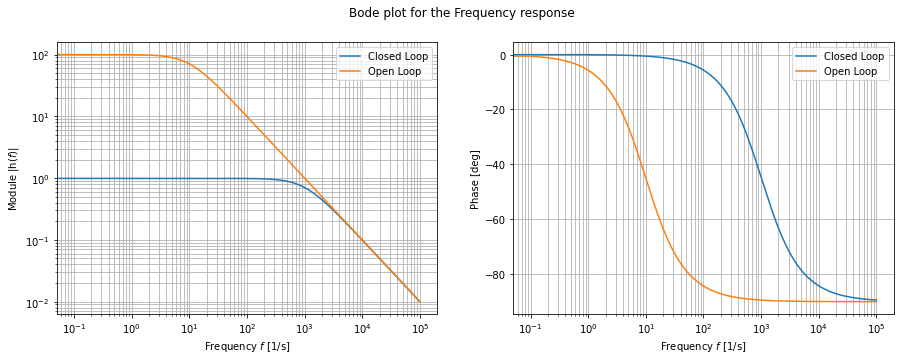

In [2]:
f = np.linspace(int(1e-1), int(1e5), int(1e6))

hol = Hol(f)
magol = np.abs(hol)
phaseol = np.arctan(np.imag(hol) / np.real(hol))*180/np.pi

hcl = Hcl(f)
magcl = np.abs(hcl)
phasecl = np.arctan(np.imag(hcl) / np.real(hcl))*180/np.pi

# Bode plot
fig, axis = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Bode plot for the Frequency response')

axis[0].plot(f, magcl, label="Closed Loop")
axis[0].plot(f, magol, label="Open Loop")
axis[0].set_xscale('log')
axis[0].set_yscale('log')
axis[0].set_xlabel("Frequency $f$ [1/s]")
axis[0].set_ylabel("Module |h($f$)|")
axis[0].grid(True, which="both")
axis[0].legend()

axis[1].plot(f, phasecl, label="Closed Loop")
axis[1].plot(f, phaseol, label="Open Loop")
axis[1].set_xscale('log')
axis[1].set_xlabel("Frequency $f$ [1/s]")
axis[1].set_ylabel("Phase [deg]")
axis[1].grid(True, which="both")
axis[1].legend()

plt.show()

### Saturation
The operating range of the transducer is $P = \pm 1 Pa$. We will assume all the quantities to be positive. The relations between $P$, $V$ and the input $P_e$ are:
\begin{array}{rcl}
V &=& \frac{G_c}{1+\beta G_c} P_e\\
V &=& \frac{G}{1+i f/f_0} P\\
\end{array}
Which lead to:
$$P_e = P \frac{G}{1+i f/f_0} \frac{1+i f/f_c}{G_c} = \frac{1+i f/f_0 + \beta G}{1+i f/f_0} = 1 + \frac{\beta G}{1+i f/f_0}$$

We require to stay within 10% of saturation, so that
$$ {P_e}_M = \frac{9}{10} \bigl(1 + \frac{\beta G}{1+i f/f_0}\bigr) P_M  = 0.9 \frac{1+i f/f_0 + \beta G}{1+i f/f_0} $$

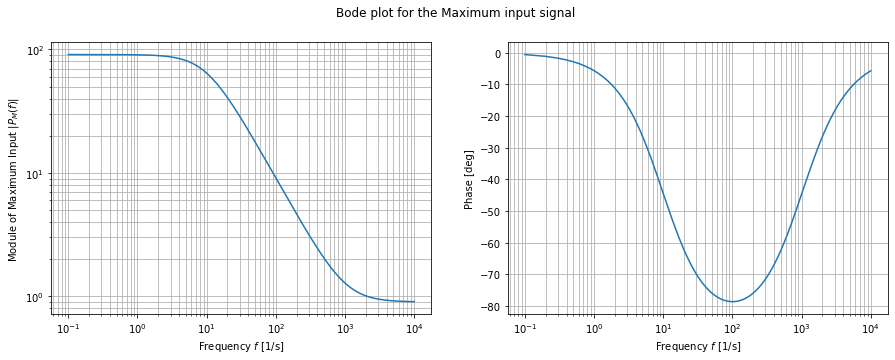

In [3]:
Hsat = lambda f: 0.9*( 1+BETA*G/(1+1j*f/F0) )

f = np.linspace(1e-1, 1e4, int(1e5))
h = Hsat(f)
mag = np.abs(h)
phase = np.arctan(np.imag(h) / np.real(h))*180/np.pi

# Bode plot
fig, axis = plt.subplots(1,2, figsize=(15, 5))
fig.suptitle('Bode plot for the Maximum input signal')

axis[0].plot(f, mag)
axis[0].set_yscale('log')
axis[0].set_xscale('log')
axis[0].set_xlabel("Frequency $f$ [1/s]")
axis[0].set_ylabel("Module of Maximum Input |$P_M$($f$)|")
axis[0].grid(True, which="both")

axis[1].plot(f, phase)
axis[1].set_xscale('log')
axis[1].set_xlabel("Frequency $f$ [1/s]")
axis[1].set_ylabel("Phase [deg]")
axis[1].grid(True, which="both")

plt.show()